In [7]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from scipy import misc

In [62]:
img = misc.imread("plate_recog/005f28bf-8371-4d97-ba00-40637f56341b.jpg")

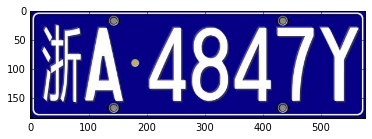

In [63]:
plt.imshow(img)

In [188]:
img.shape

(184, 577, 3)

In [183]:
pad_ratio_w = 2
pad_ratio_h = 2
height, width, _ = img.shape
height_p = int(height * (1 + pad_ratio_h))
width_p = int(width * (1 + pad_ratio_w))

In [184]:
color = [int(np.random.rand() * 255), int(np.random.rand() * 255), int(np.random.rand() * 255)]
pad_img = np.tile(color, height_p * width_p)
pad_img = np.reshape(pad_img, (height_p, width_p, 3))
pad_img = pad_img.astype(np.uint8)

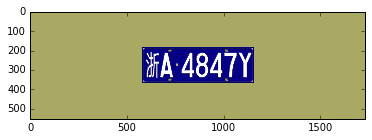

In [185]:
h_start = int(height * pad_ratio_h / 2)
w_start = int(width * pad_ratio_w / 2)
pad_img[h_start:h_start + height, w_start:w_start + width,:] = img
plt.imshow(pad_img)

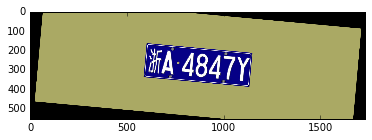

In [186]:
# random angle from -10 degree to 10 degree
angle = 20 * (np.random.rand() - 0.5)
# angle = 10
# random scale from 0.8 to 1.2
scale = np.random.rand() * 0.2 - 0.1 + 1 
# scale = 0.9
M = cv2.getRotationMatrix2D((width_p//2, height_p//2), angle, scale)
dst = cv2.warpAffine(pad_img, M, (width_p, height_p))
plt.imshow(dst)

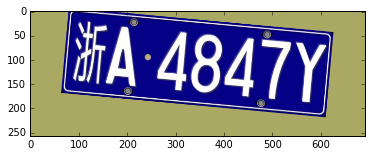

In [187]:
crop_h_ratio = 1.4
crop_w_ratio = 1.2
crop_h_start = int(height * pad_ratio_h / 2 - (crop_h_ratio - 1) / 2 * height + np.random.rand() * 30)
crop_w_start = int(width * pad_ratio_w / 2 - (crop_w_ratio - 1) / 2 * width + np.random.rand() * 30)
crop_h = int(height * crop_h_ratio)
crop_w = int(width * crop_w_ratio)
crop_dst = dst[crop_h_start:crop_h_start + crop_h, crop_w_start:crop_w_start + crop_w, :]
plt.imshow(crop_dst)